# Setting Up the Environment

## Import Libraries

In [9]:
#Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

#Seaborn is a data visualization library built on matplotlib
import seaborn as sns

#Set the plotting style
sns.set_style("whitegrid")

#Model Processing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Model metrics and analysis
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.anova import anova_lm

In [10]:
url = "https://raw.githubusercontent.com/Kaurgurpreet23/Education/main/data/EdGap_data.xlsx"
response = requests.get(url)
edgap = pd.read_excel(io.BytesIO(response.content), dtype={'NCESSCH School ID': object})

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Handling File Downloads and Special Options

## Download the school information set

In [11]:
!wget ccd_sch_029_1617_w_1a_11212017 https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2025-10-09 00:25:54--  http://ccd_sch_029_1617_w_1a_11212017/
Resolving ccd_sch_029_1617_w_1a_11212017 (ccd_sch_029_1617_w_1a_11212017)... failed: Name or service not known.
wget: unable to resolve host address ‘ccd_sch_029_1617_w_1a_11212017’
--2025-10-09 00:25:54--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0 [following]
--2025-10-09 00:25:55--  https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucebec153289

In [12]:
!ls

'ccd_sch_029_1617_w_1a_11212017.csv?dl=0'   sample_data


## Load the school information data in pandas

In [13]:
school_information = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= "unicode_escape")

/tmp/ipython-input-3313897470.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= "unicode_escape")


# Exploring the Datasets

## Start by looking at the head of each data frame

### This will let us see the names of the columns and a few examples values for each column. We can also check whether the data is in tody format.

#### Edgap Data Set

In [14]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


### School Information Data Set

In [15]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


#### There are some hidden columns, Lets look at all the columns

In [16]:
pd.set_option ('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


# Identifying Differences Between Data Sets

### Use the info method to check the data types, size of the data frame, and numbers of the missing values.

#### Edgap Data Set

In [17]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


#### School Information Data Set

In [18]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

# Summary

1.   The School Information Data set is much larger than the Edgap Data Set. Clearly, the Edgap data set does not include all the schools.
2.   There are missing values in each data set.

1.   Each Data Set is in a tidy or long format.
2.   The data types for the variables of interest look correct, but the school identifier is an object in the Edgap data set and a float64 in School Information Data Set.





# Assess the suitability of the data for the problem

## Are the data suitable for answering the question

### We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

### Make a pair plot to explore relationships between the variables

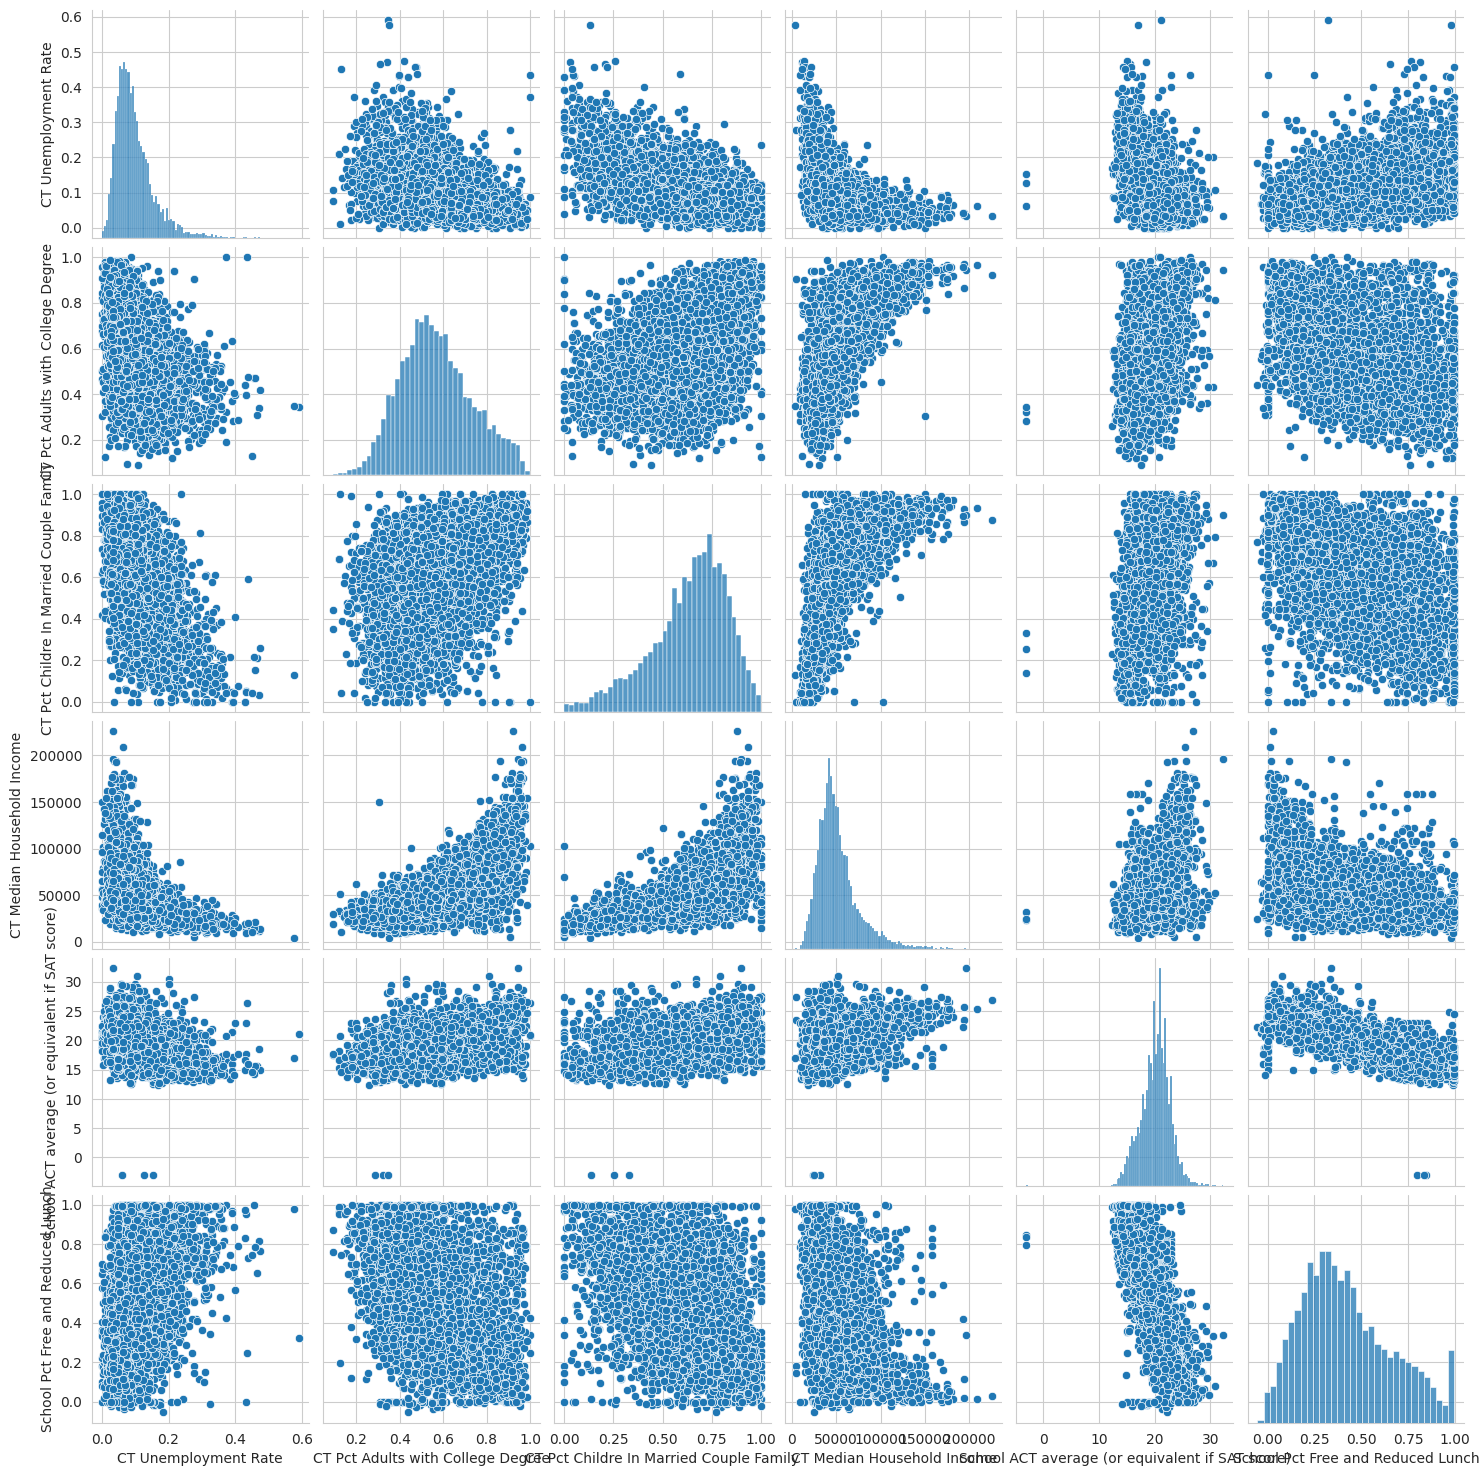

In [19]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

### Add regression lines and format the pair plot

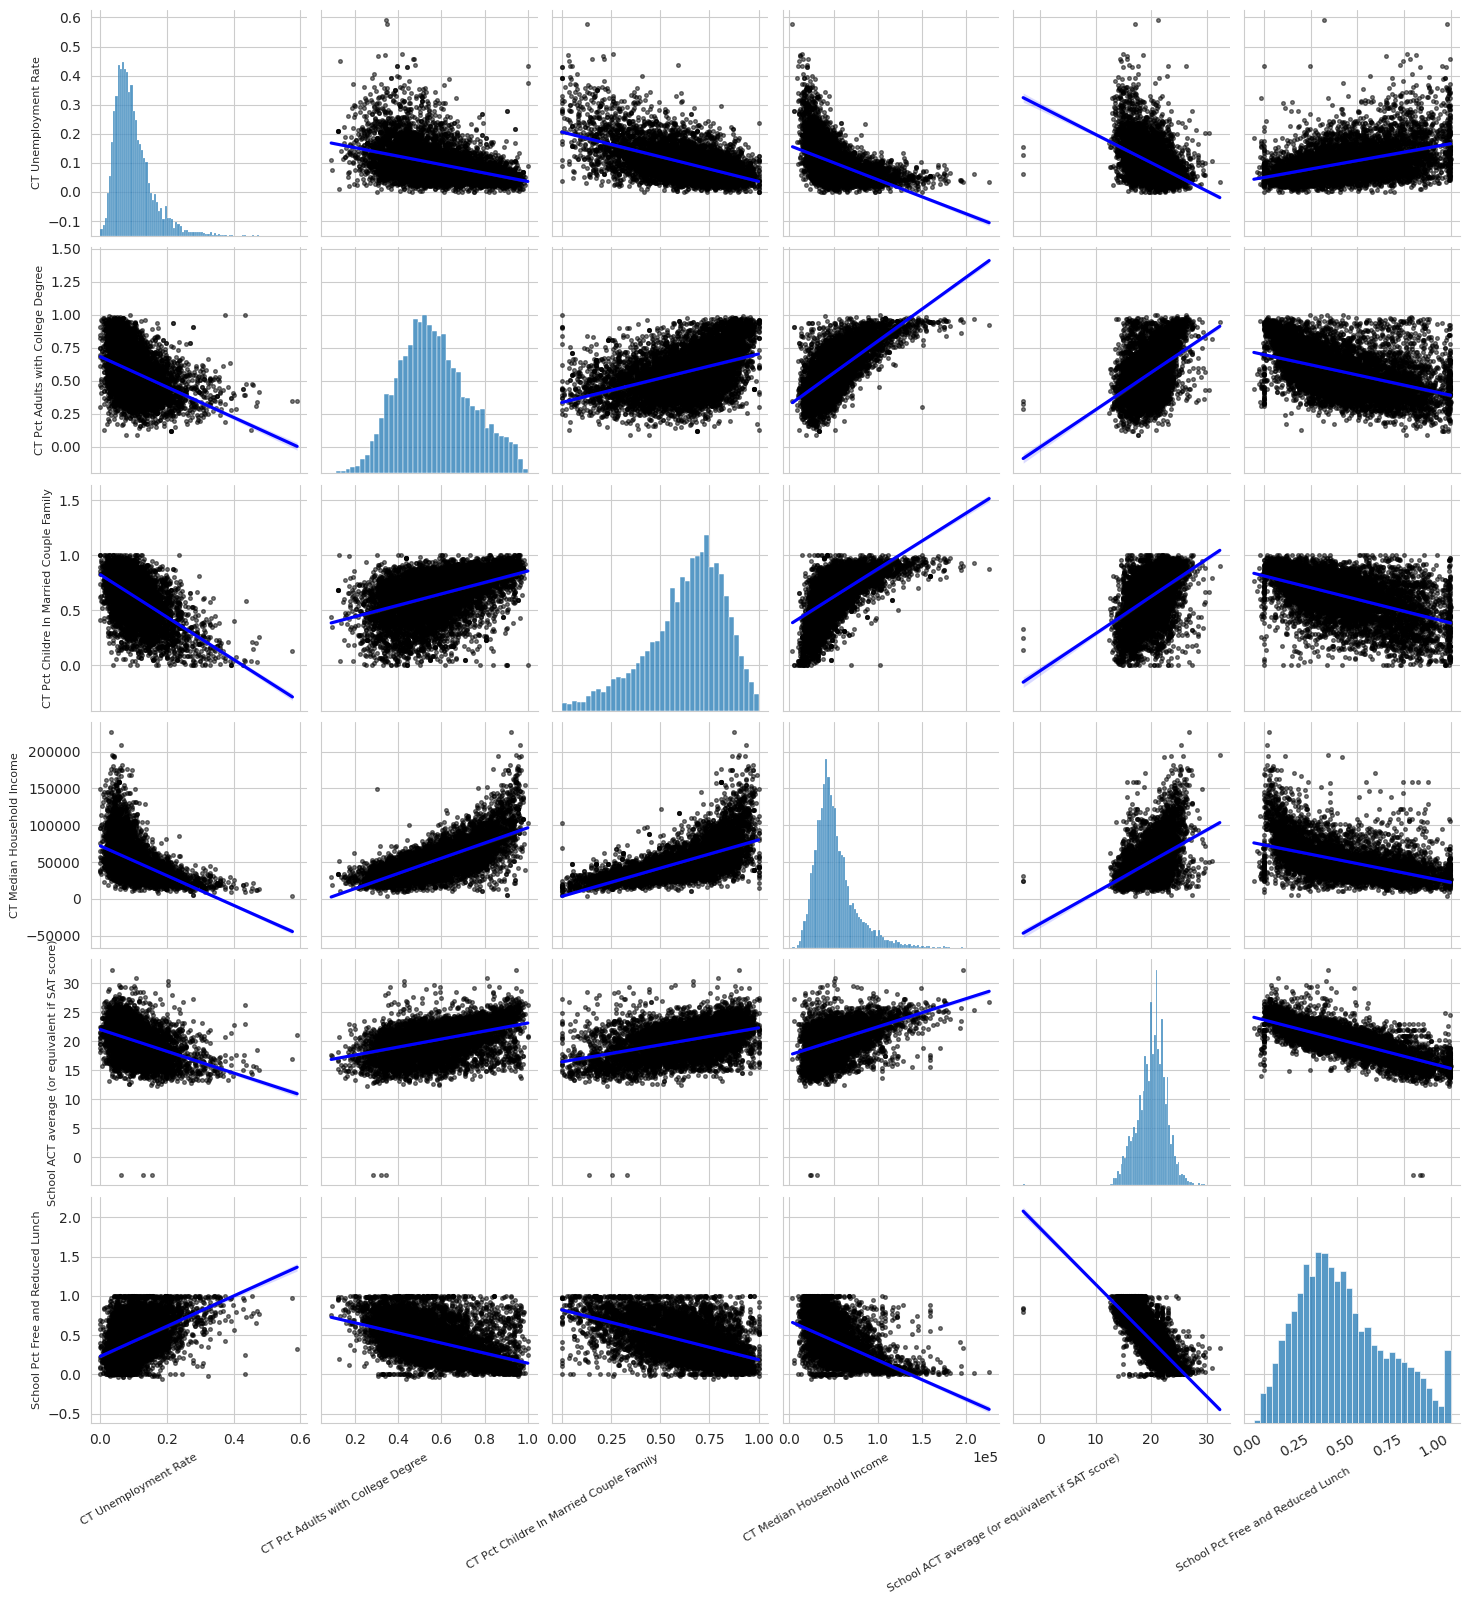

In [20]:
fig=sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
    "line_kws":{'color':'blue'},
    "scatter_kws": {"alpha" : 0.5, "color" : "k" , "s":7},
    }

)
for ax in fig.axes.flat:
   if ax.get_xlabel() == "CT Median Household Income":
     ax.ticklabel_format(style='sci', axis='x' , scilimits=(0,0)) #Apply Scientific Notation
   ax.set_xlabel(ax.get_xlabel(), fontsize= 8, rotation=30, ha='right') #X-axis Label size and Rotation
   ax.set_ylabel(ax.get_ylabel(), fontsize= 8) #Y-axis Label size

#Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()



## Summary




1.   There appears to be a relationship between socioeconomic variables and the ACT score.
2.   There are some out of range ACT and percent lunch values that will need to be dealt with.
1.   We should have confidence that it is worthwhile to spend time preparing the data for analysis.






#Select relevant subsets of the data and rename the columns

## Data Preparation

### The school information data set contains many columns. We only need the year, school identity, location and school type information

#### Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT

In [21]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [22]:
school_information.head()


,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Rename Columns

#### We will rename the columns to follow best practices of style and being informative. We can do this before or after joining the data sets. We will do it before joining the data sets to make it obvious that the key has the same name in each data set (this is not required but it makes work more readible)

In [23]:
edgap= edgap.rename(
    columns = {
    "NCESSCH School ID" : "id",
    "CT Pct Adults with College Degree" : "percent_college",
    "CT Unemployment Rate" : "unemployment_rate",
    "CT Pct Childre In Married Couple Family" : "percent_married",
    "CT Median Household Income" : "median_income",
    "School ACT average (or equivalent if SAT score)" : "act_average",
    "School Pct Free and Reduced Lunch" : "percent_lunch",
    }
)

In [24]:
school_information=school_information.rename(
    columns = {
    "SCHOOL_YEAR" : "year",
    "NCESSCH" : "id",
    "LSTATE" : "state",
    "LZIP" : "zip_code",
    "SCH_TYPE_TEXT" : "school_type",
    "LEVEL" : "school_level",
    "CHARTER_TEXT" : "charter"
    }
)

In [25]:
edgap.head()

,id,unemployment_rate,percent_college,percent_married,median_income,act_average,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [26]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


# Summary



1.   We selected a subset of columns of the school information data set
2.   We renamed the columns for clarity and to follow formatting guidelines.

1.   We are ready to join the data frames





# Join the Data Frames

### We want to joi the data frames using the identity of the school as the key. The identity is given by NCESSCH school identity. The value is an object in Edgap data set and float in the school information data set.

### We will cast the id column in the school_information DataFrame as an object.

In [27]:
school_information['id'] = school_information['id'].astype('object')

In [28]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


## Join both the data frames and combine them as df

In [29]:
df = edgap.merge(
    school_information,
    how ='left',
    on='id'
)

In [30]:
df.head()

,id,unemployment_rate,percent_college,percent_married,median_income,act_average,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   unemployment_rate  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   act_average        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


# Summary



1. We joined the data sets using the school id as the key.
1. We first cast the id as an object in school infomation data set to have the same data type for the key in each data set.
2. We used a left join to keep all the Edgap Data.





# Quality Control

### There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

### We can use the describe() method to compute descriptive statistics

In [32]:
df.describe()

,unemployment_rate,percent_college,percent_married,median_income,act_average,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


### The same can be done by using the min and max

In [33]:
df.select_dtypes(include=['number']).agg(['min','max']).round(2)

,unemployment_rate,percent_college,percent_married,median_income,act_average,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


## Set out of range values to Nan using np.nan

In [34]:
df.loc[df['percent_lunch']<0, 'percent_lunch'] = np.nan


In [35]:
df.loc[df['act_average'] < 1, 'act_average'] = np.nan

## Check the types, levels and charter status of schools

In [36]:
df['school_type'].value_counts()

,count
school_type,
Regular School,7885
Alternative School,10
Special Education School,2
Career and Technical School,1


In [37]:
df['school_level'].value_counts()

,count
school_level,
High,7230
Other,631
Not reported,35
Elementary,2


In [38]:
df['charter'].value_counts()

,count
charter,
No,7329
Yes,352
Not applicable,217


## Keep only the High Schools

In [39]:
df= df.loc[df['school_level']== 'High']

## Check for duplicated rows

In [40]:
df.duplicated().sum()

np.int64(0)

# Identify missing values

## How many values of each variable are missing?

In [41]:
df.isna().sum().to_frame(name='Number of missing value')

,Number of missing value
id,0
unemployment_rate,12
percent_college,11
percent_married,20
median_income,16
act_average,3
percent_lunch,20
year,0
state,0
zip_code,0


## What percentage of values of each variable are missing

In [42]:
percent_missing = df.isna().mean().round(4)*100
percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
unemployment_rate,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
act_average,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


## What states do we have data from?

In [43]:
df['state'].value_counts()

,count
state,
TX,913
OH,654
IL,564
PA,543
MI,498
NC,407
FL,404
GA,367
WI,351


In [44]:
df['state'].nunique()

20

## Plot the results on map

In [45]:
import plotly.offline as po
import plotly.graph_objs as pg

In [46]:
layout=dict(
    geo={"scope":"usa"} , coloraxis_colorbar=dict(title="Number of Schools")
)

data=dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x=pg.Figure(data=[data], layout=layout)

po.iplot(x)

### We are missing a large amount of USA data due to omission. This is not evident by examining Nan values in the data set.

### We could obtain this information from public records, but we will not do that here.

## Drop the rows where ACT score is missing

In [47]:
df=df.dropna(subset="act_average")

In [48]:
df.isna().sum().to_frame(name='Number of missing value')

,Number of missing value
id,0
unemployment_rate,12
percent_college,11
percent_married,20
median_income,16
act_average,0
percent_lunch,20
year,0
state,0
zip_code,0


### If we drop the rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variable where data were present. So, we will not drop the rows in this data set that are missing socioeconomic variables. We will impute the missing values.

# Summary


1.   We have set out of range values to Nan values and will impute them.
2.   We kept only high schools.
1.   We removed the schools where we do not have ACT scores.
1.   Many schools are missing from the data by omission.
2.   We will impute missing values for socioeconomic variables.






# Data Imputation

## Define the predictor variables to be unemployment_rate, percent_college, percent_married, median_income, percent_lunch, state and charter.

In [49]:
predictor_variables=[
    'unemployment_rate',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

## Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [51]:
imputer= IterativeImputer()

## Fit the imputer using numerical predictor variables (this can include dummies for categorical variables).

### Define the columns you want to use in the imputation process

In [52]:
numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['unemployment_rate', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


### Fit the imputer

In [53]:
  imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

### Impute the missing values in the training data

In [54]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

### Check for missing values

In [55]:
df.isna().sum().to_frame(name='Number of missing value')

,Number of missing value
id,0
unemployment_rate,0
percent_college,0
percent_married,0
median_income,0
act_average,0
percent_lunch,0
year,0
state,0
zip_code,0


## Export the clean Data Set

In [56]:
df.to_csv(
    'education_clean.csv',
     encoding='utf-8-sig',
     index=False
    )

In [57]:
from google.colab import files
files.download('education_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary


1.   We used an iterative imputer to estimate missing values of numerical predictor values
2.   We saved the clean data frame as a csv file.





# Exploratory Data Analysis

## Load the clean data

## Load the data

In [58]:
df=pd.read_csv('https://raw.githubusercontent.com/Kaurgurpreet23/Education/refs/heads/main/data/education_clean.csv')

In [59]:
df.head()

,id,unemployment_rate,percent_college,percent_married,median_income,act_average,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


## Examine distribution and relationships

###Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

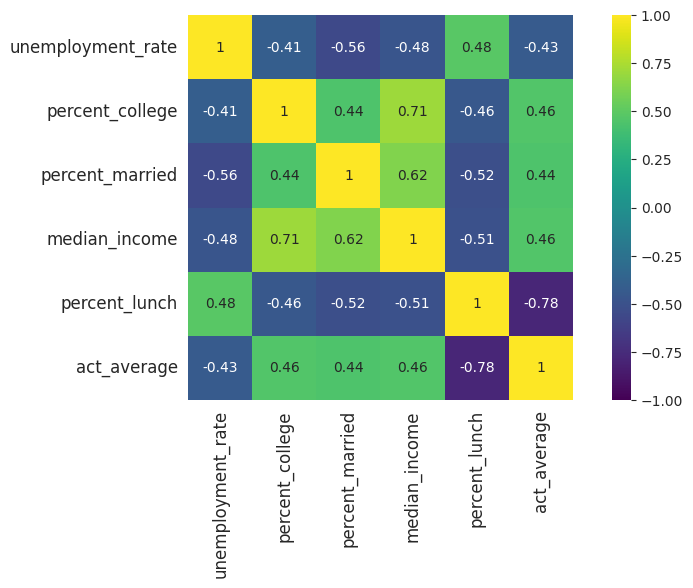

In [62]:
predictor_variables= ['unemployment_rate', 'percent_college', 'percent_married', 'median_income', 'percent_lunch','state','charter']

numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix=df[numerical_predictors+["act_average"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

## Make pair plots to show relationships between the variables

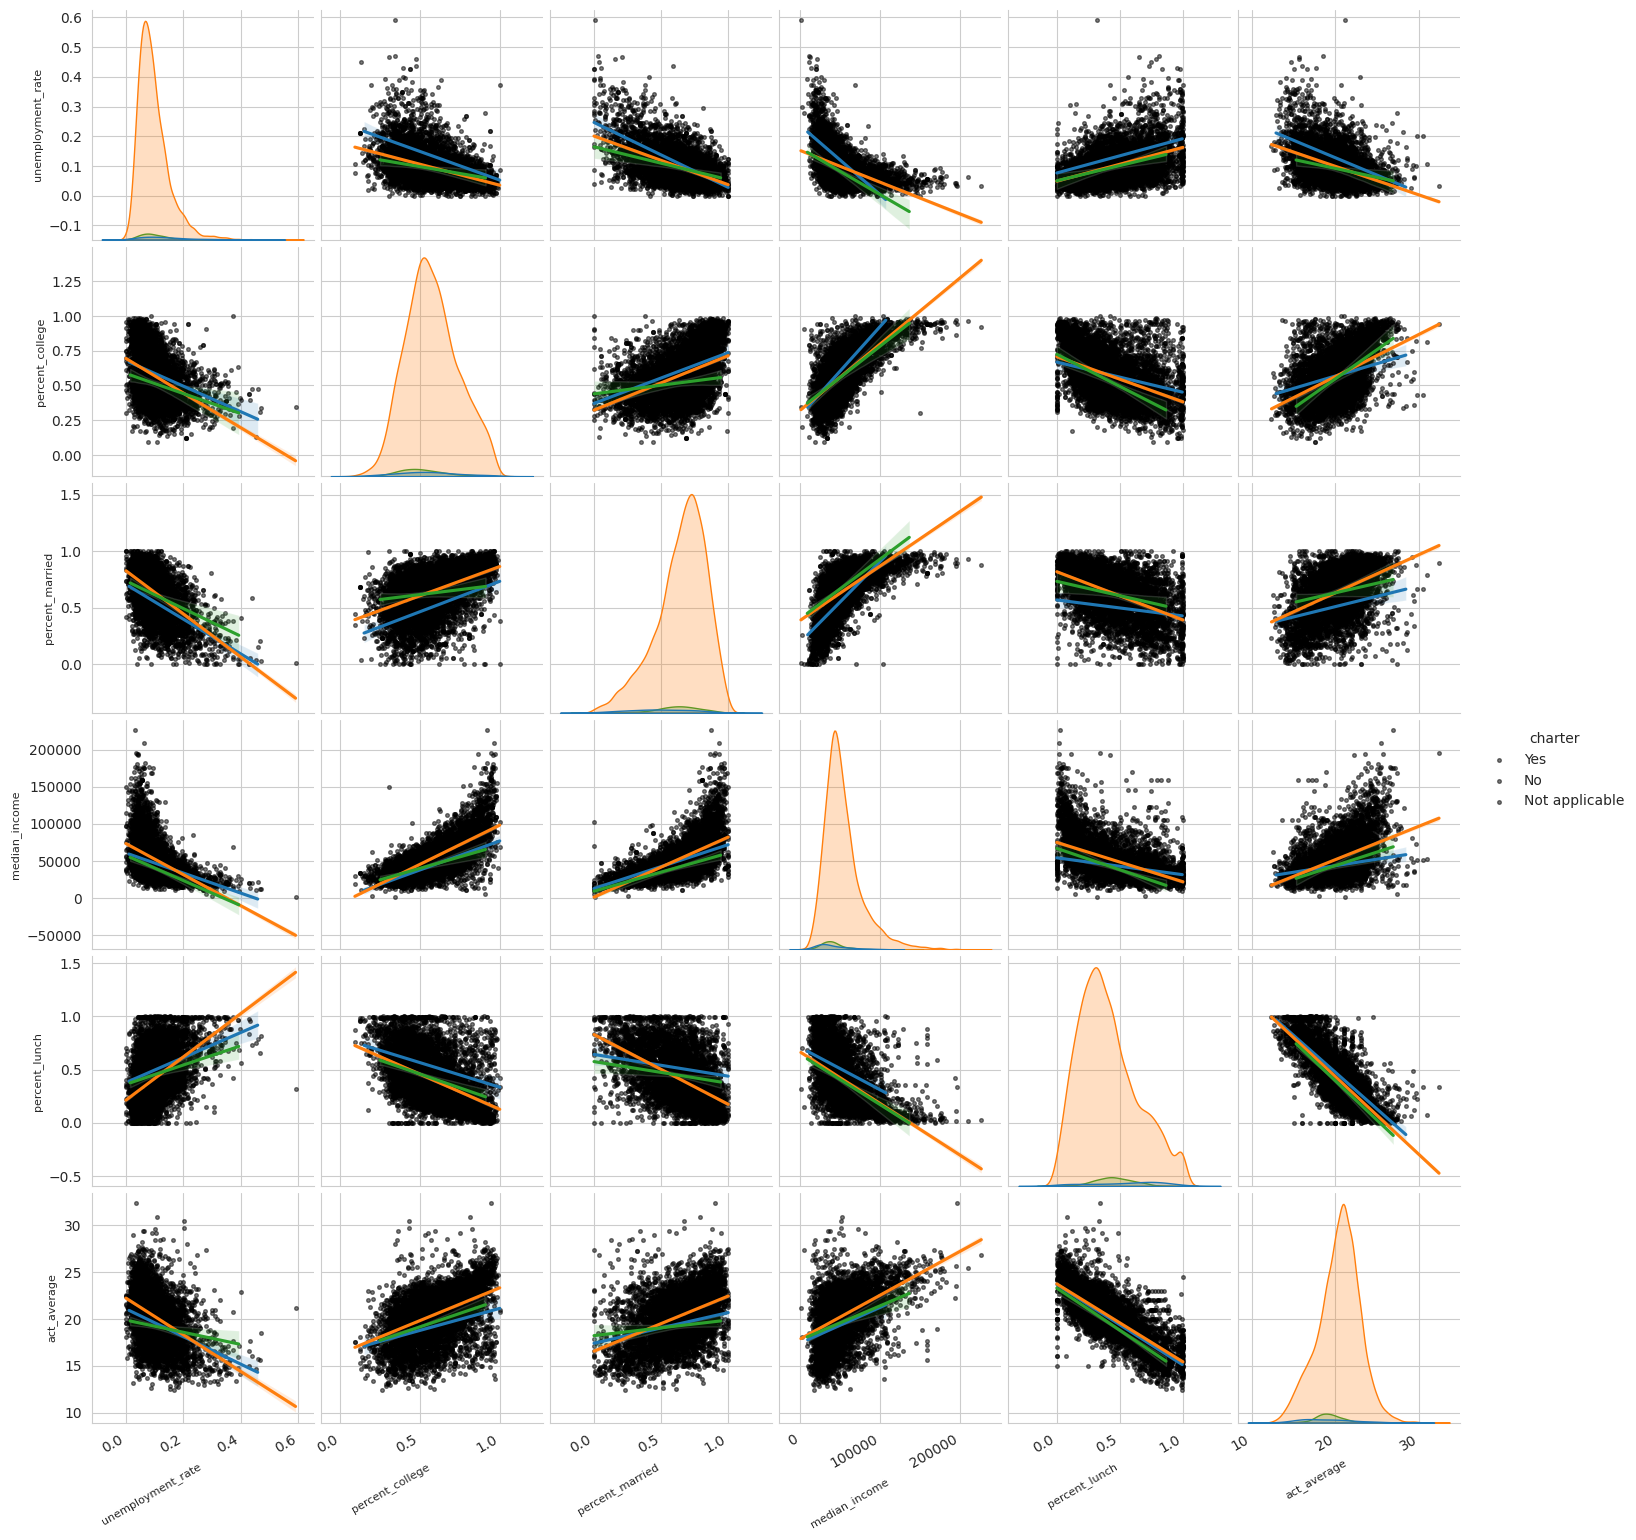

In [67]:
fig=sns.pairplot(
data=df,
vars= numerical_predictors + ["act_average"],
hue='charter',
kind="reg",
plot_kws = {"scatter_kws": {"alpha":0.5, "color":"k", "s":7},
},
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == "CT Median Household Income":
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #Apply Scientific Notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') #X-axis Label size and Rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8) #Y-axis Label size

  #Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

## Identify Outliers

### We can use the interquartile range to identify outliers. This is also evident in the boxplots of the data. Median income is on a way different scale than the other predictors, so we will make two plots to explore the data.

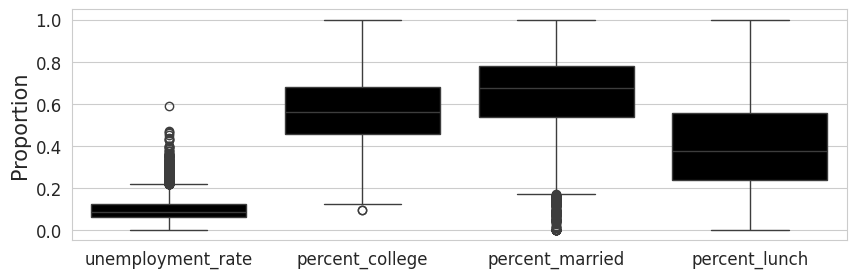

In [68]:
plt.figure(figsize=(10, 3))

fractions= list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

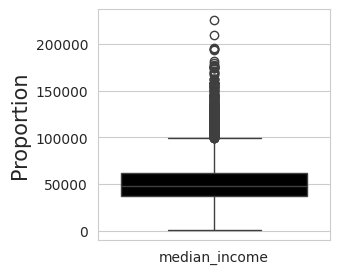

In [69]:
plt.figure(figsize=(3, 3))

sns.boxplot(data=df[['median_income']], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.show()

## Summary

1.   The numerical predictors are related to act_average. The relationships appear roughly linear.
1.   The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.
1.   Some variables have skewed distributions, suggesting that transformation of input variables might be useful.
2.   There are outliers in unemployment_rate, percent_college, percent_married and median_income. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transormation to these predictors as we explore different models.
2.   The relationships are similar across charter and non-charter schools but might be significantly different.


